### Instacart, a grocery ordering and delivery app, aims to make it easy to fill your refrigerator and pantry with your personal favorites and staples when you need them. After selecting products through the Instacart app, personal shoppers review your order and do the in-store shopping and delivery for you.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import random
import math
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",50)
plt.rcParams["figure.figsize"] = [20,10]

In [2]:
aisle = pd.read_csv("aisles.csv")
dept = pd.read_csv("departments.csv")
opp = pd.read_csv("order_products__prior.csv")
opt = pd.read_csv("order_products__train.csv")
order = pd.read_csv("orders.csv")
prod = pd.read_csv("products.csv")

In [3]:
aisle.head(1)

,aisle_id,aisle
0,1,prepared soups salads


In [4]:
dept.head(1)

,department_id,department
0,1,frozen


In [5]:
opp.head(1)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1


In [6]:
opt.head(1)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1


In [7]:
order.head(1)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN


In [8]:
prod.head(1)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19


In [9]:
print("aisle ",aisle.shape)
print(aisle.dtypes)
print("dept ",dept.shape)
print(dept.dtypes)
print("opp ",opp.shape)
print(opp.dtypes)
print("opt ",opt.shape)
print(opt.dtypes)
print("order ",order.shape)
print(order.dtypes)
print("prod ",prod.shape)
print(prod.dtypes)

aisle  (134, 2)
aisle_id     int64
aisle       object
dtype: object
dept  (21, 2)
department_id     int64
department       object
dtype: object
opp  (32434489, 4)
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object
opt  (1384617, 4)
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object
order  (3421083, 7)
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object
prod  (49688, 4)
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object


### EDA

In [10]:
organic = prod['product_name'].str.contains('Organic')
prod['is_organic'] = organic
prod.iloc[20:30].head()

,product_id,product_name,aisle_id,department_id,is_organic
20,21,Small & Medium Dental Dog Treats,40,8,False
21,22,Fresh Breath Oral Rinse Mild Mint,20,11,False
22,23,Organic Turkey Burgers,49,12,True
23,24,Tri-Vi-Sol® Vitamins A-C-and D Supplement Drop...,47,11,False
24,25,Salted Caramel Lean Protein & Fiber Bar,3,19,False


* Order

In [11]:
order.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [12]:
#order["order_dow"] = order["order_dow"].map({0: 'Saturday',1: 'Sunday',2: 'Monday',3: 'Tuesday',4: 'Wednesday',
#                                             5: 'Thursday',6: 'Friday'})

In [13]:
order["order_dow"].unique()

array([2, 3, 4, 1, 5, 0, 6], dtype=int64)

In [14]:
#hour_nums = list(range(24))
#order["order_hour_of_day"] = order["order_hour_of_day"].map({hour_num:datetime.time(hour_num).strftime("%I:00 %p") for hour_num in hour_nums})

In [15]:
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [16]:
order["order_hour_of_day"].unique()

array([ 8,  7, 12, 15,  9, 14, 16, 11, 10, 19, 18, 17, 13, 20,  0, 21, 22,
        5, 23,  4,  6,  1,  2,  3], dtype=int64)

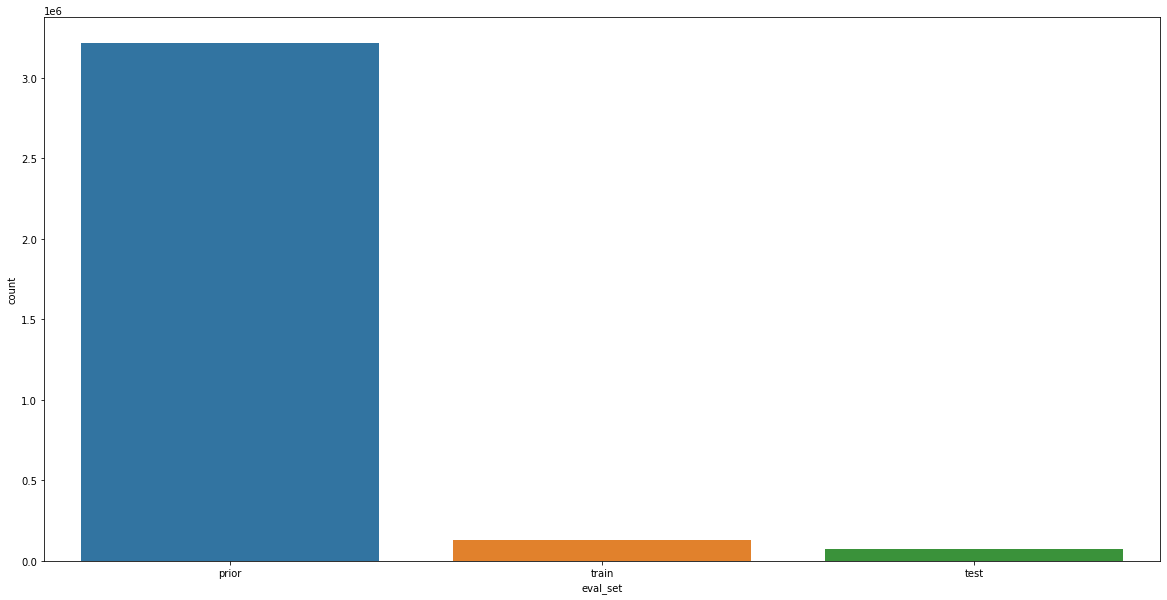

In [17]:
sns.countplot(x='eval_set', data=order)
plt.show()

In [18]:
order_products = pd.concat([opt, opp])

In [19]:
order_products = order_products.merge(prod, on='product_id', how='left').merge(order, on='order_id', how='left').merge(dept, on='department_id').merge(aisle, on='aisle_id')

In [20]:
total_orders = order_products['order_id'].nunique()
print('Count of total orders: ', total_orders)

Count of total orders:  3346083


In [21]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,is_organic,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,False,112108,train,4,4,10,9.0,dairy eggs,yogurt
1,98,43654,3,1,Whole Milk Greek Blended Vanilla Bean Yogurt,120,16,False,56463,train,41,3,8,14.0,dairy eggs,yogurt
2,170,8153,6,0,Plain Non-Fat Greek Yogurt,120,16,False,182389,train,7,0,13,14.0,dairy eggs,yogurt
3,631,9203,13,1,Dairy Free Coconut Milk Raspberry Yogurt Alter...,120,16,False,184099,train,7,3,9,30.0,dairy eggs,yogurt
4,631,15842,14,1,Dairy Free Coconut Milk Yogurt Alternative,120,16,False,184099,train,7,3,9,30.0,dairy eggs,yogurt


* Order Products Prior

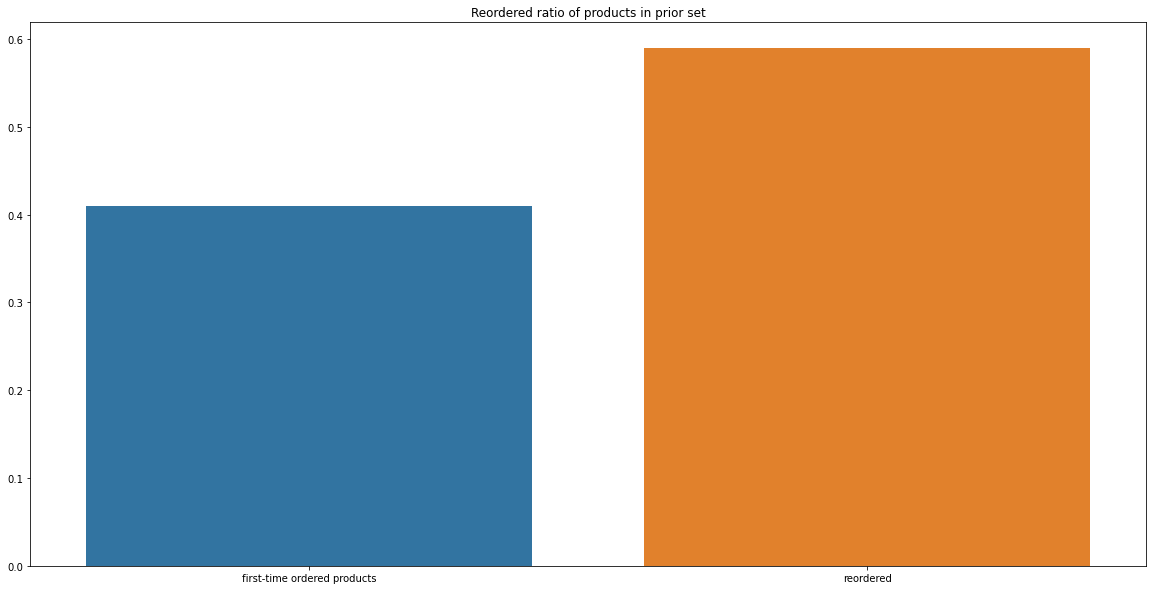

In [22]:
total_prod_count = opp.shape[0]
reorder_ratio = opp['reordered'].value_counts()/total_prod_count
ax = sns.barplot(x=reorder_ratio.index, y=reorder_ratio.values)
ax.set_xticklabels(['first-time ordered products', 'reordered'])
plt.title('Reordered ratio of products in prior set')
plt.show()

* Order Products Train

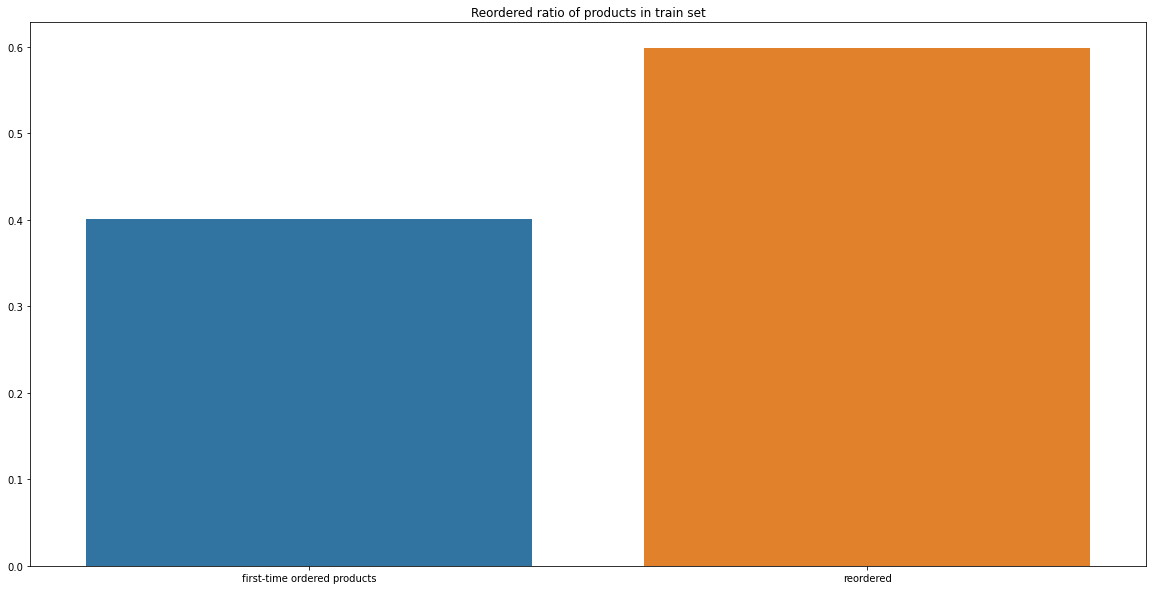

In [23]:
total_prod_count = opt.shape[0]
reorder_ratio = opt['reordered'].value_counts()/total_prod_count
ax = sns.barplot(x=reorder_ratio.index, y=reorder_ratio.values)
ax.set_xticklabels(['first-time ordered products', 'reordered'])
plt.title('Reordered ratio of products in train set')
plt.show()

In [24]:
group = order_products.groupby(['order_id']).agg({'reordered':'mean', 'order_number':'first'}).reset_index().rename(columns={'reordered':'reordered_ratio'})
group['no_reordered'] = group['reordered_ratio'] == 0
group['all_reordered'] = group['reordered_ratio'] == 1.0

In [25]:
nfo = order.order_number != 1
nfc = np.sum(nfo)

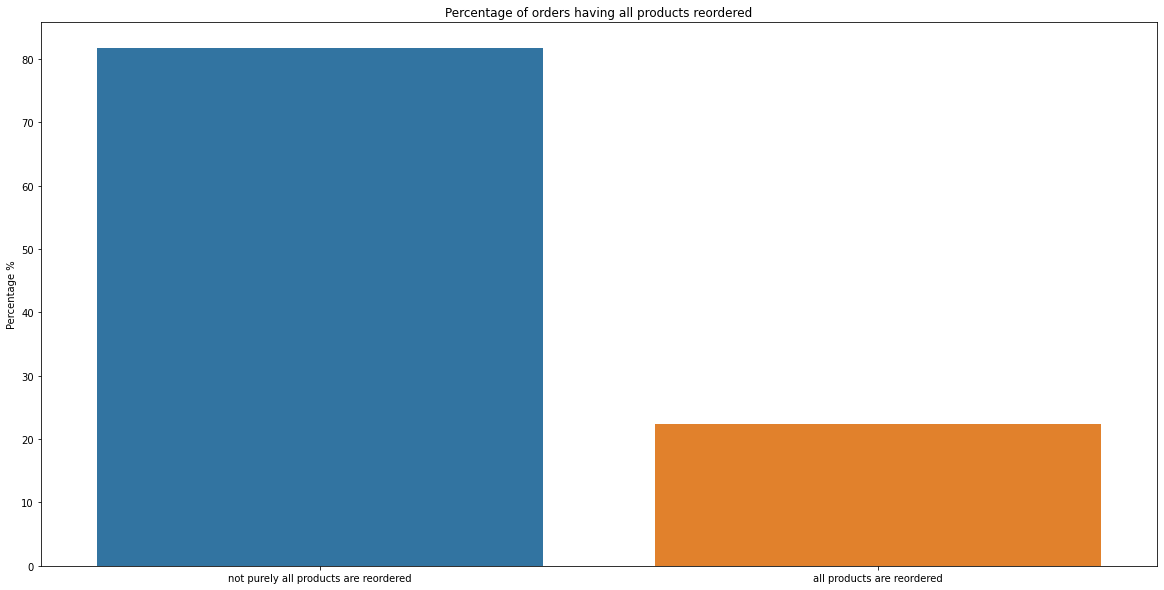

In [26]:
group['all_reordered'] = group['reordered_ratio'] == 1.0
arc = group['all_reordered'].value_counts()/nfc * 100
ax = sns.barplot(x=arc.index, y=arc.values)
ax.set_xticklabels(['not purely all products are reordered', 'all products are reordered'])
plt.title('Percentage of orders having all products reordered')
plt.ylabel('Percentage %')
plt.show()

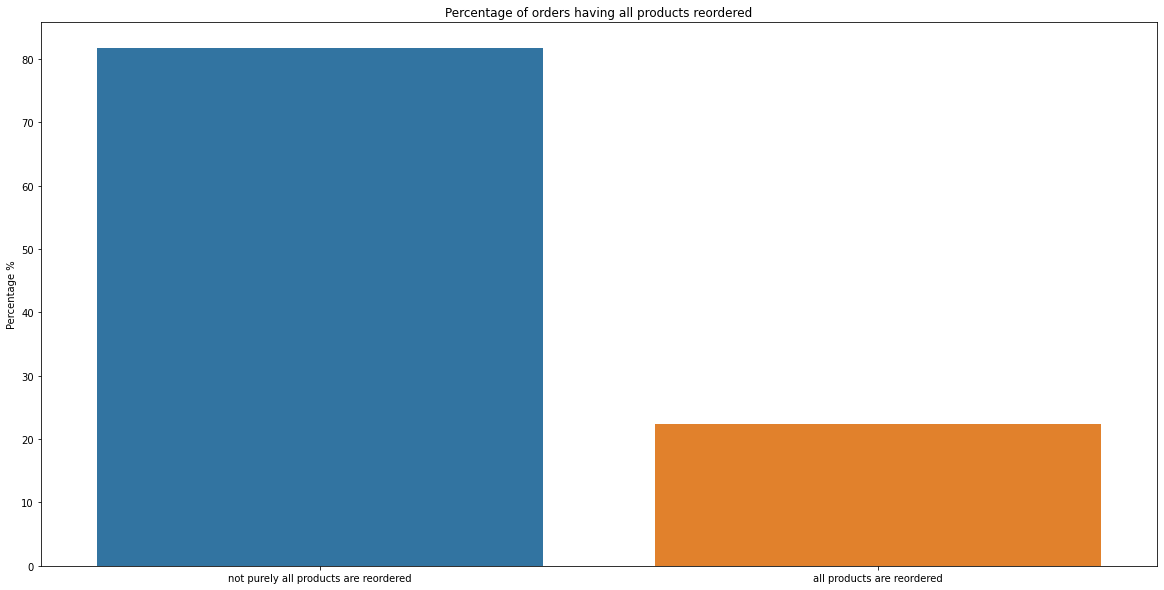

In [27]:
group['all_reordered'] = group['reordered_ratio'] == 1.0
arc = group['all_reordered'].value_counts()/nfc * 100
ax = sns.barplot(x=arc.index, y=arc.values)
ax.set_xticklabels(['not purely all products are reordered', 'all products are reordered'])
plt.title('Percentage of orders having all products reordered')
plt.ylabel('Percentage %')
plt.show()

In [28]:
group.head()

,order_id,reordered_ratio,order_number,no_reordered,all_reordered
0,1,0.500000,4,False,False
1,2,0.666667,3,False,False
2,3,1.000000,16,False,True
3,4,0.923077,36,False,False
4,5,0.807692,42,False,False


* Count Of Reordered Products In A Basket

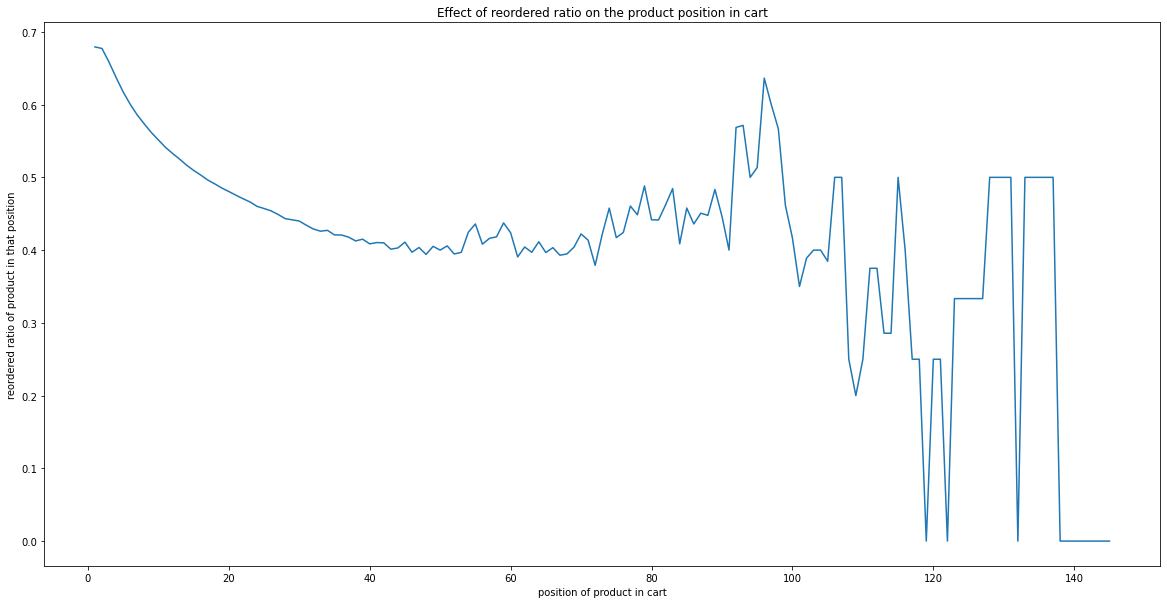

In [29]:
group = order_products.groupby(['add_to_cart_order']).agg({'reordered':'mean'}).rename(columns={'reordered':'reordered_ratio'}).reset_index()
sns.lineplot(x=group['add_to_cart_order'], y=group['reordered_ratio'])
plt.title('Effect of reordered ratio on the product position in cart')
plt.xlabel('position of product in cart')
plt.ylabel('reordered ratio of product in that position')
plt.show()

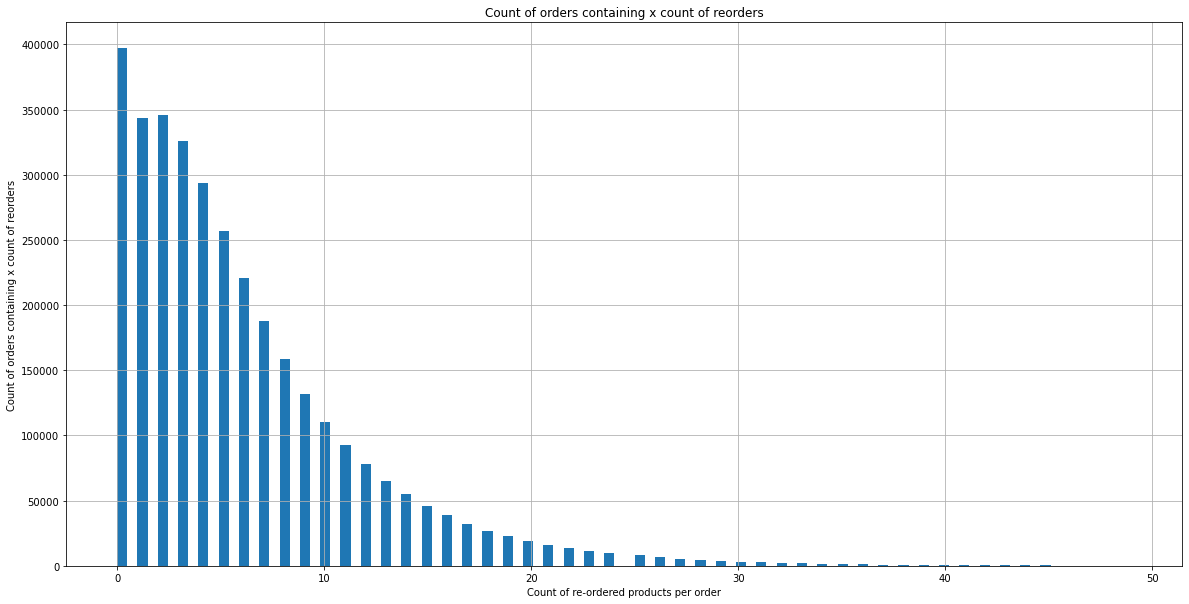

In [30]:
crp = order_products.groupby(['order_id'], as_index=False)['reordered'].sum()
crp['crp'] = crp['reordered']
less_than_50_reordered_products = crp[crp['crp']<50]
less_than_50_reordered_products['crp'].hist(bins=100)
plt.ylabel('Count of orders containing x count of reorders')
plt.xlabel('Count of re-ordered products per order')
plt.title('Count of orders containing x count of reorders')
plt.show()

In [31]:
rpc = crp.groupby(['crp'], as_index=False).count()
rpc['count_of_orders'] = rpc['reordered']
rpc['percentage_of_this_reordered_count'] = (rpc['count_of_orders']/total_orders) * 100
rpc = rpc[['crp','count_of_orders','percentage_of_this_reordered_count']]
mask = rpc['percentage_of_this_reordered_count'] > 0.5
rpc = rpc[mask].sort_values(by=['percentage_of_this_reordered_count'], ascending=False)

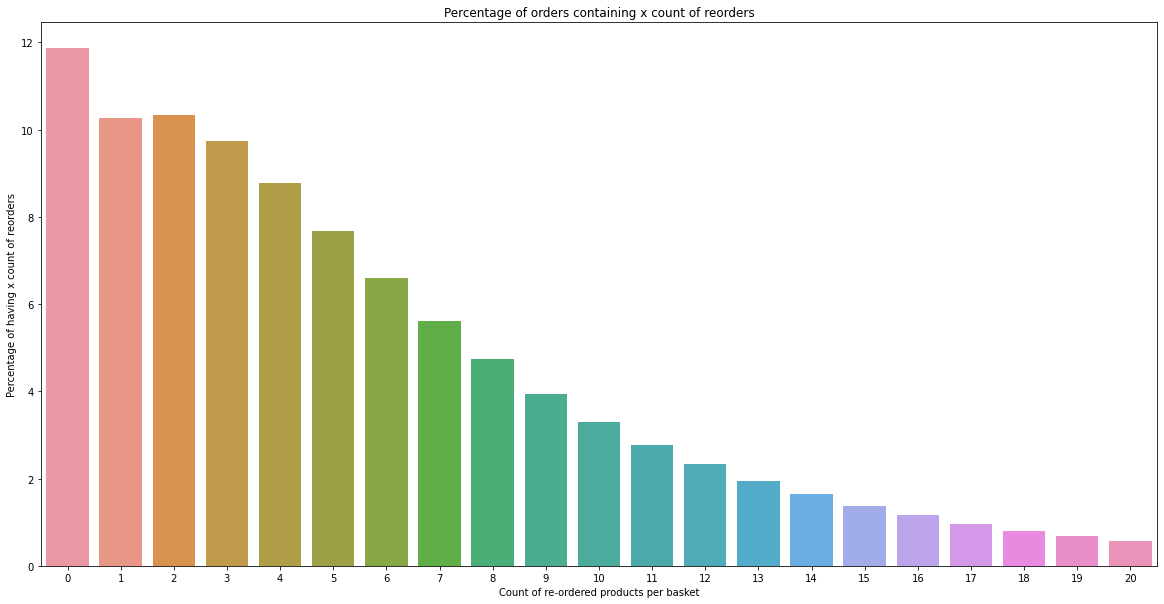

In [32]:
sns.barplot(x=rpc['crp'], y=rpc['percentage_of_this_reordered_count'].values)
plt.ylabel('Percentage of having x count of reorders')
plt.xlabel('Count of re-ordered products per basket')
plt.title('Percentage of orders containing x count of reorders')
plt.show()

In [33]:
rpc.head()

,crp,count_of_orders,percentage_of_this_reordered_count
0,0,397115,11.868056
2,2,345543,10.326791
1,1,343396,10.262626
3,3,325774,9.735981
4,4,293718,8.777965


In [34]:
del less_than_50_reordered_products, crp, rpc, mask

* User

In [35]:
nfo = order_products['order_number'] != 1
group = order_products[nfo].groupby(['user_id']).agg({'reordered':'mean', 'order_number':'count'}).rename(columns={'reordered':'reordered_ratio'})
mask = group['reordered_ratio'] == 1
rusersid = group[mask].index.to_list()
print('Count of users who always order the same products every time:', len(rusersid))

Count of users who always order the same products every time: 685


In [36]:
rand_indx = random.randint(0,len(rusersid))
rand_user_id = rusersid[rand_indx]
user_mask = order['user_id'] == rand_user_id
user_orders = order[user_mask]['order_id'].to_list()
print(f'Orders of user {rand_user_id}:')
print(f'Count of his orders: {len(user_orders)}')
for order_id in user_orders:
    print(f'Order number{order_id}:')
    print(order_products[order_products['order_id'] == order_id]['product_name'].to_list())
del group, mask, rusersid

Orders of user 143032:
Count of his orders: 6
Order number1591426:
['Spring Water', 'Roasted Pine Nut Hummus', 'Fresh Scent Laundry Detergent', 'April Fresh Liquid Fabric Softener']
Order number1967310:
['Spring Water']
Order number2290860:
['Spring Water', 'Fresh Scent Laundry Detergent', 'April Fresh Liquid Fabric Softener']
Order number234358:
['Spring Water']
Order number3057346:
['Spring Water']
Order number70422:
['Spring Water']


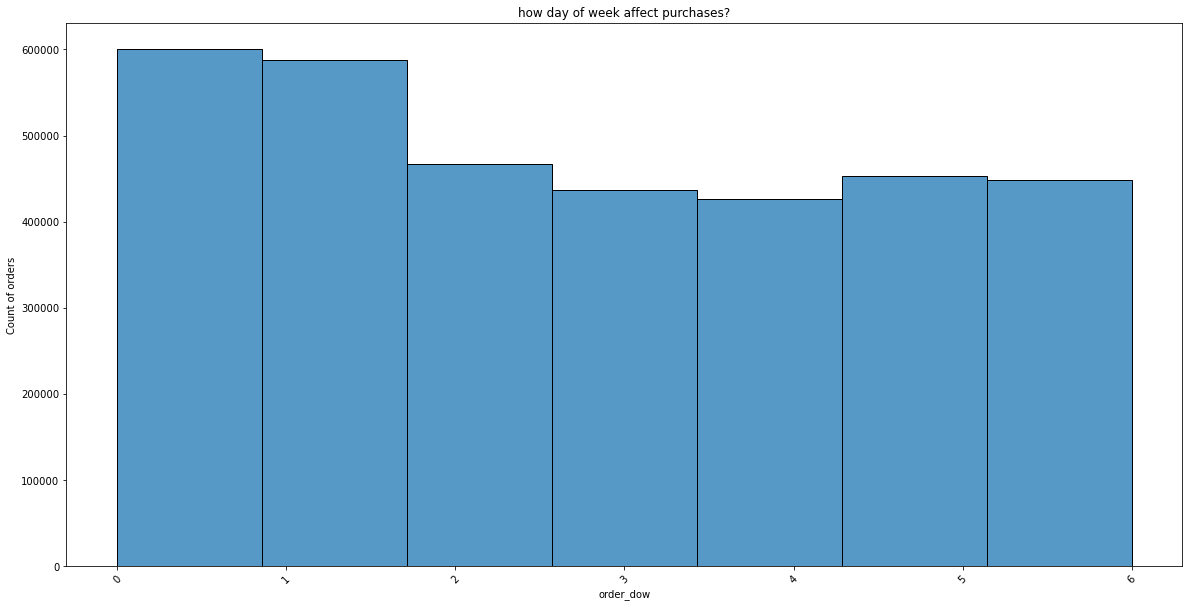

In [37]:
sns.histplot(data=order, x='order_dow', bins=7)
plt.xlabel('order_dow')
plt.ylabel('Count of orders')
plt.title('how day of week affect purchases?')
plt.xticks(rotation= 45)
plt.show()

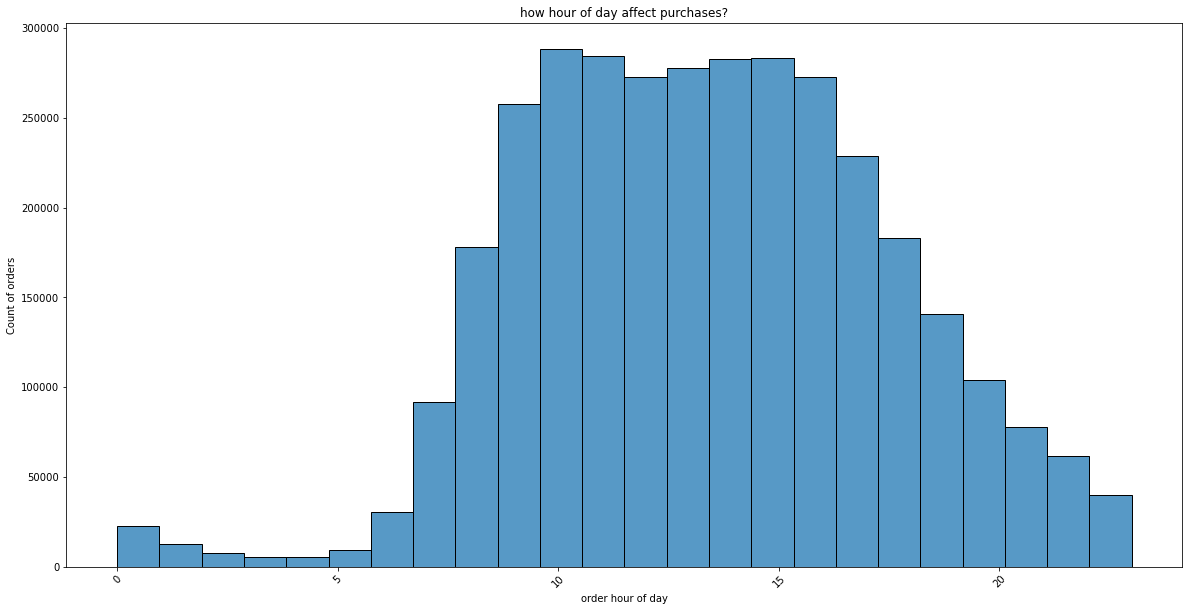

In [38]:
sns.histplot(data=order, x='order_hour_of_day', bins=24)
plt.xlabel('order hour of day')
plt.xticks(rotation= 45)
plt.ylabel('Count of orders')
plt.title('how hour of day affect purchases?')
plt.show()

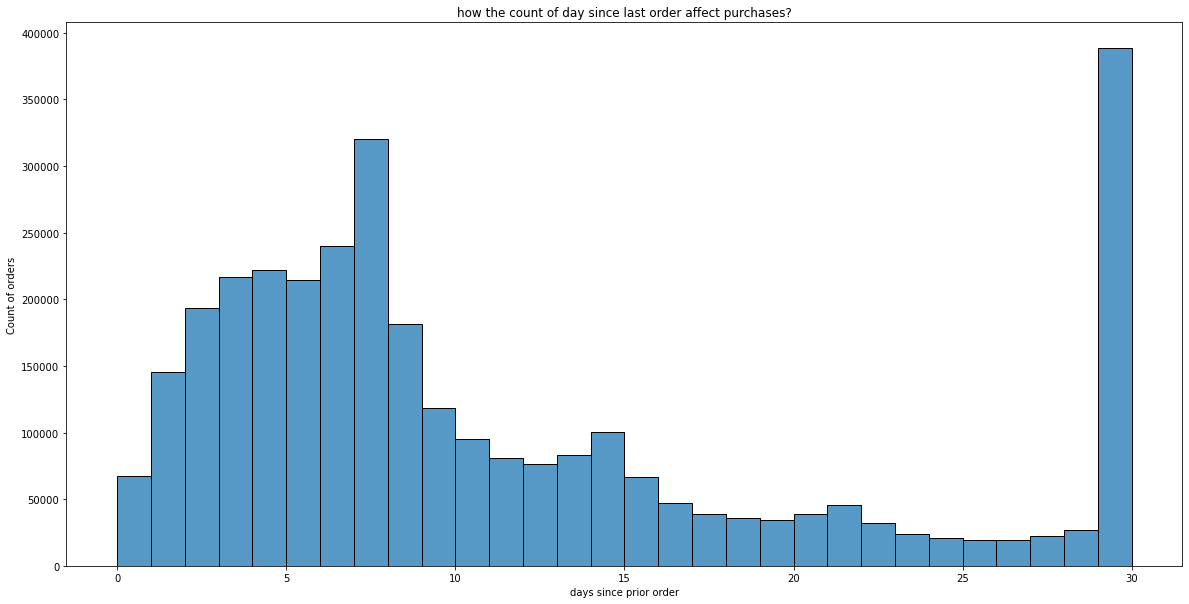

In [39]:
sns.histplot(data=order, x='days_since_prior_order', bins=30)
plt.xlabel('days since prior order')
plt.ylabel('Count of orders')
plt.title('how the count of day since last order affect purchases?')
plt.show()

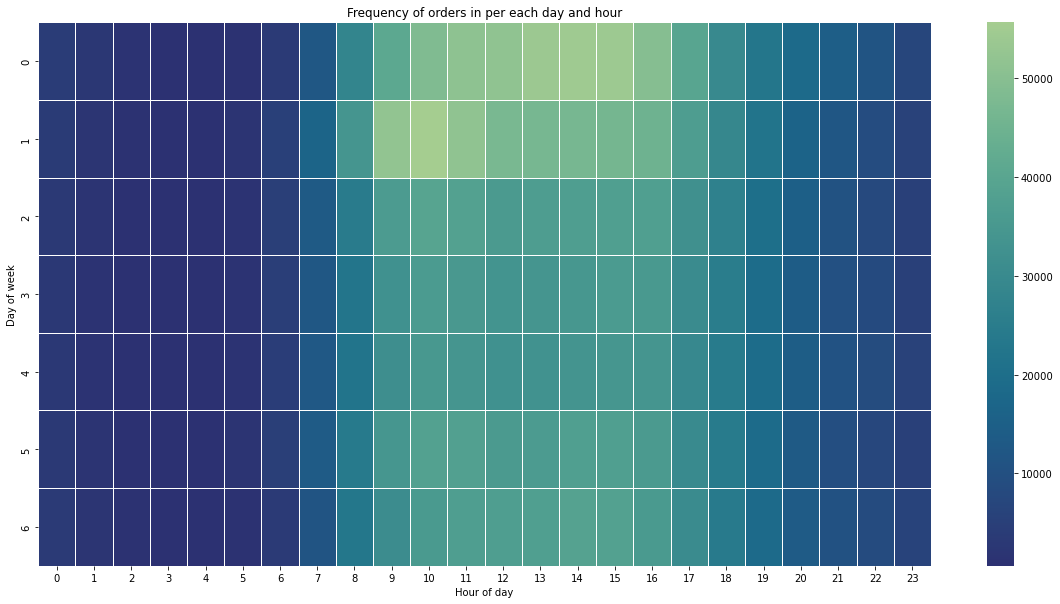

In [40]:
group = order.groupby(['order_dow', 'order_hour_of_day'])['order_id'].agg('count').reset_index().rename(columns={'order_id':'orders_count'})
heatmap_data = group.pivot('order_dow', 'order_hour_of_day', 'orders_count')

ax = sns.heatmap(data=heatmap_data, cmap="crest_r", linewidths=.5)
plt.title('Frequency of orders in per each day and hour')
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.show()

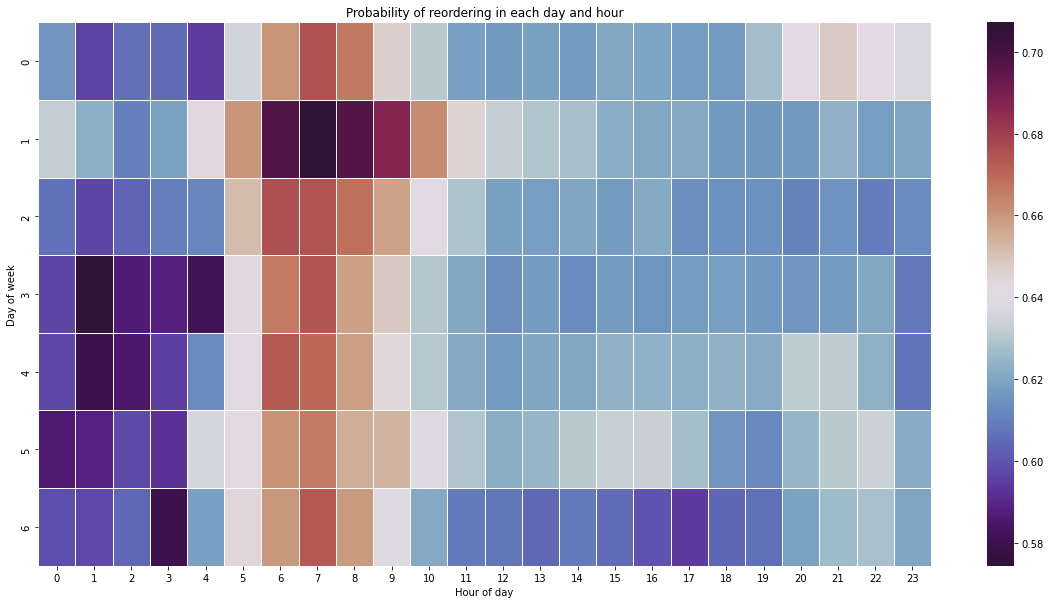

In [41]:
nfo = order_products['order_number'] != 1
group = order_products[nfo].groupby(['order_dow', 'order_hour_of_day']).agg({'reordered':'mean'}).reset_index().rename(columns={'reordered':'reordered_ratio'})
heatmap_data = group.pivot('order_dow', 'order_hour_of_day', 'reordered_ratio')

ax = sns.heatmap(data=heatmap_data, cmap="twilight_shifted", linewidths=.5)
plt.title('Probability of reordering in each day and hour')
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.show()

*  Days Since Last Order

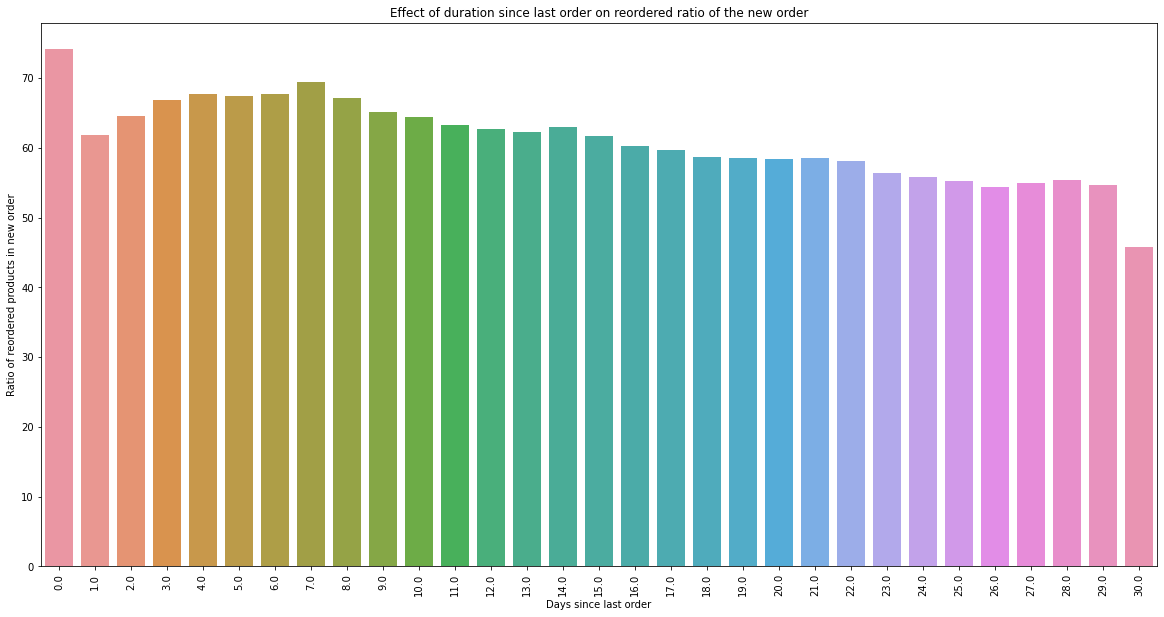

In [42]:
group = order_products.groupby(['days_since_prior_order']).agg({'reordered': 'mean'}).rename(columns={'reordered':'reordered_ratio'}).reset_index()
sns.barplot(x=group['days_since_prior_order'], y=group['reordered_ratio']*100)
plt.ylabel('Ratio of reordered products in new order')
plt.xlabel('Days since last order')
plt.xticks(rotation=90)
plt.title('Effect of duration since last order on reordered ratio of the new order')
plt.show()

* How often a product is purchased?

In [43]:
frequency = order_products.groupby('product_name')['order_id'].aggregate('count').reset_index()
frequency['count_of_ordering'] =  frequency['order_id']
frequency = frequency.sort_values(by=['count_of_ordering'], ascending=False)

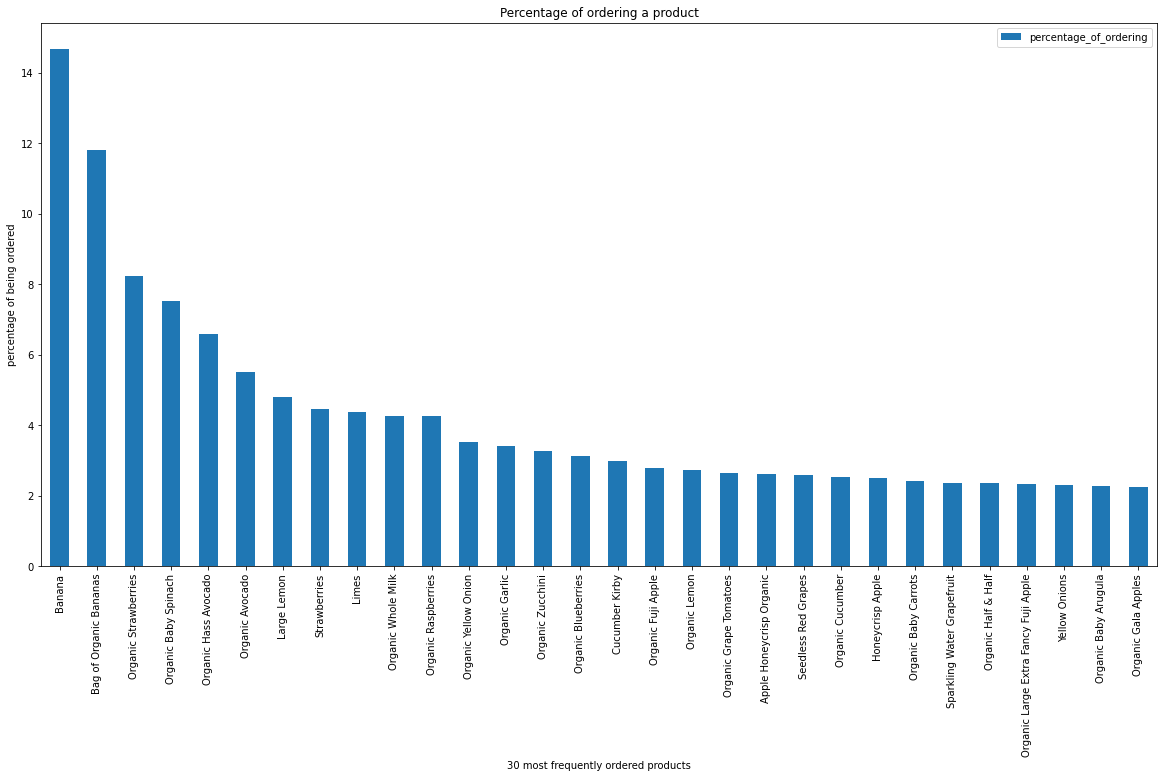

In [44]:
frequency['percentage_of_ordering'] = (frequency['count_of_ordering']/total_orders) * 100 
frequency.iloc[:30].plot.bar(x='product_name', y='percentage_of_ordering')
plt.xlabel('30 most frequently ordered products')
plt.ylabel('percentage of being ordered')
plt.xticks(rotation=90)
plt.title('Percentage of ordering a product')
plt.show()

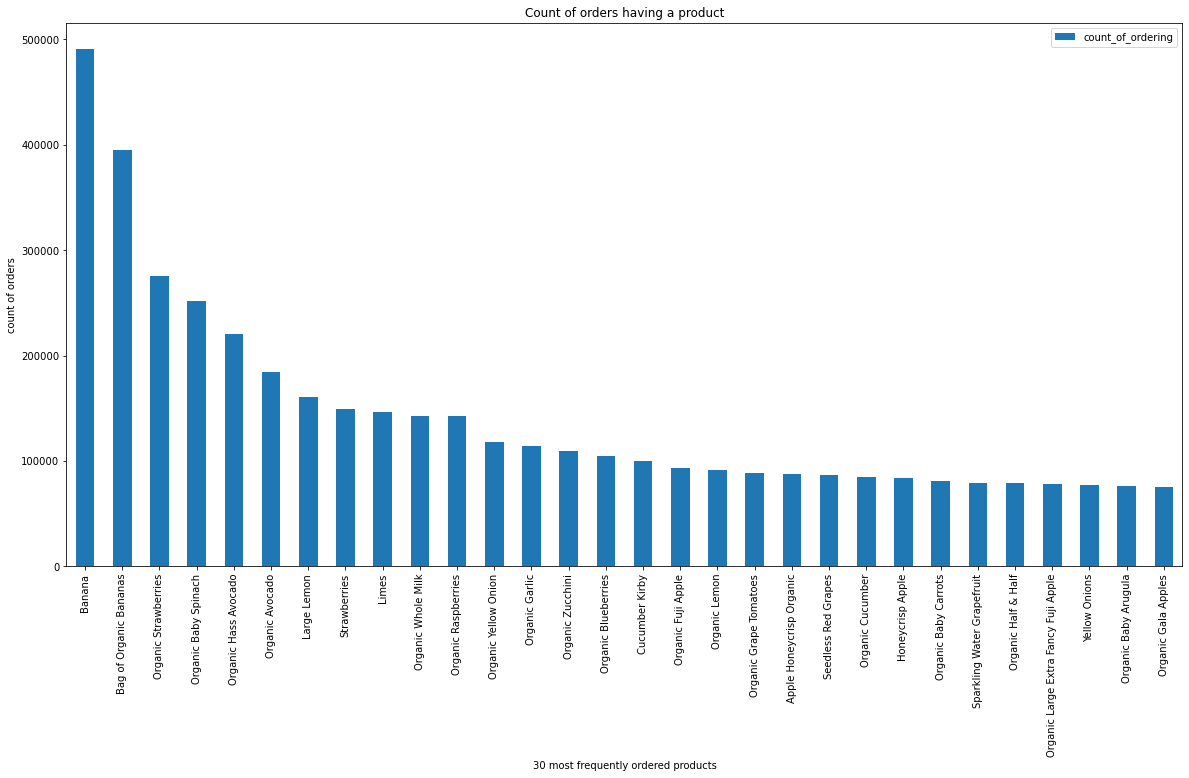

In [45]:
frequency.iloc[:30].plot.bar(x='product_name', y='count_of_ordering')
plt.xlabel('30 most frequently ordered products')
plt.ylabel('count of orders')
plt.xticks(rotation=90)
plt.title('Count of orders having a product')
plt.show()

del frequency

* How often a product is the first item purchased?

In [46]:
first = order_products[order_products['add_to_cart_order'] == 1]
freq = first.groupby(['product_name'], as_index = False)['order_id'].count().sort_values(by=['order_id'], ascending=False)
freq['count_of_ordering_first'] = freq['order_id']

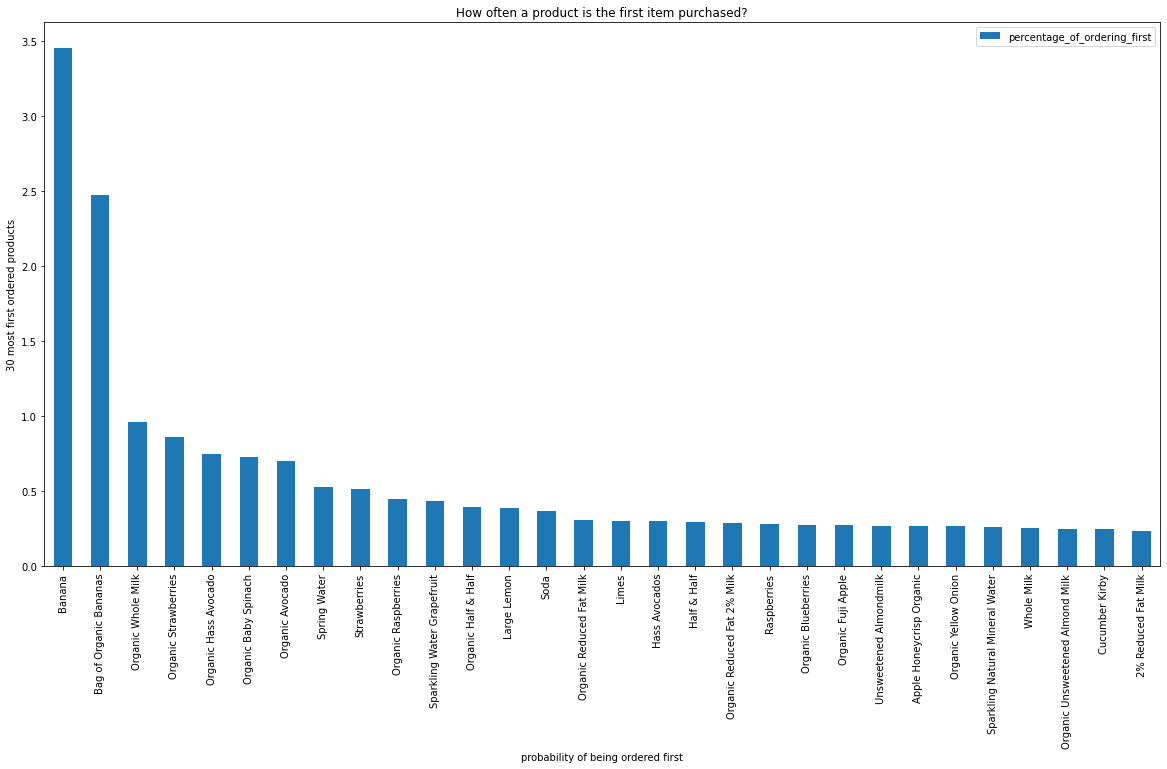

In [47]:
freq['percentage_of_ordering_first'] = (freq['count_of_ordering_first']/total_orders) * 100
freq.iloc[:30].plot.bar(x='product_name', y='percentage_of_ordering_first')
plt.ylabel('30 most first ordered products')
plt.xlabel('probability of being ordered first')
plt.xticks(rotation=90)
plt.title('How often a product is the first item purchased?')
plt.show()

del first, freq

In [48]:
order_products['is_first_in_cart'] = order_products['add_to_cart_order'] == 1
group = order_products.groupby(['product_name'], as_index = False).agg({'is_first_in_cart': 'mean', 'order_id': 'count'}).rename(columns={'is_first_in_cart':'first_in_cart', 'order_id':'orders_count'})
confident_products_mask = group['orders_count'] > 100
groupf = group[confident_products_mask].sort_values(by='first_in_cart', ascending=False)

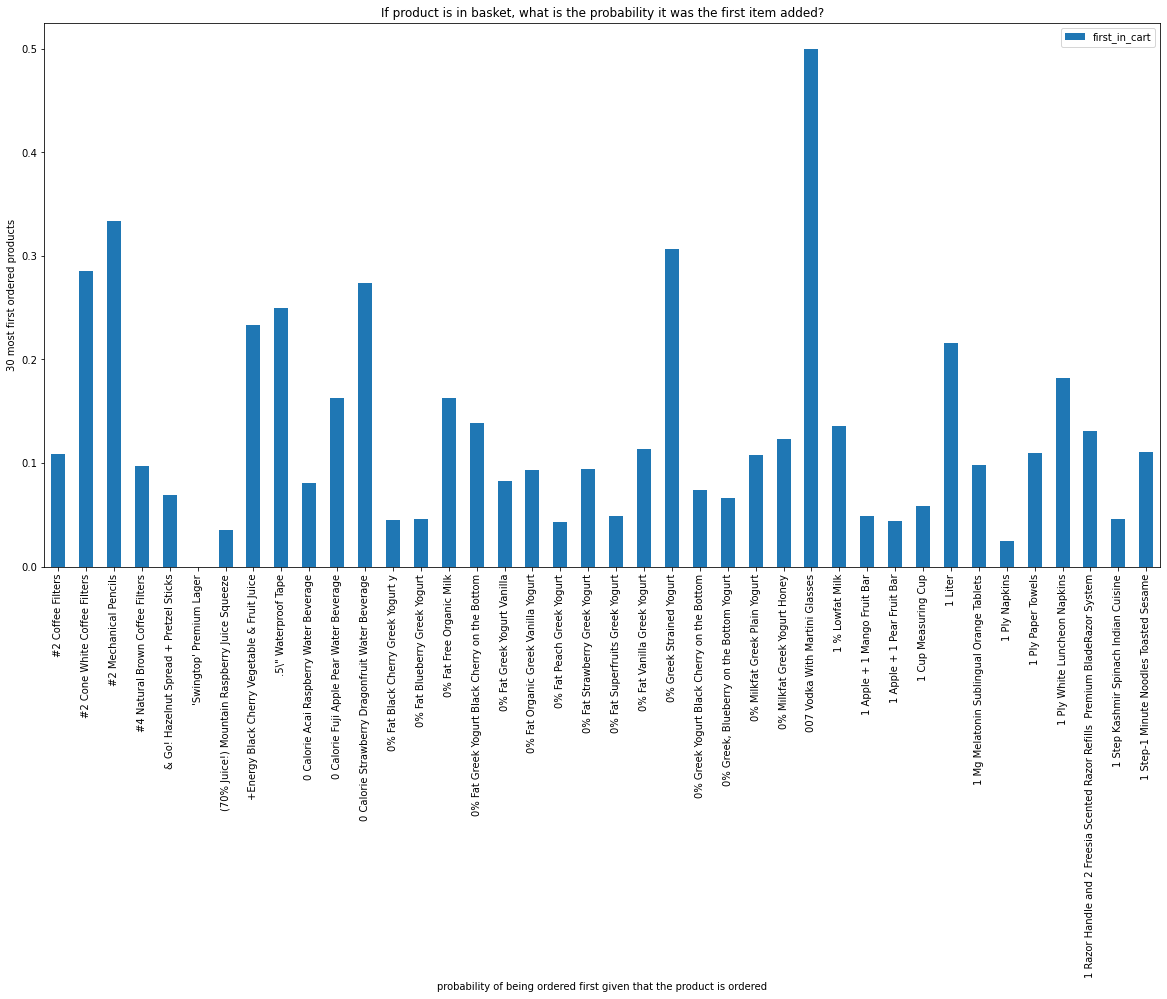

In [49]:
group.iloc[:40].plot.bar(x='product_name', y='first_in_cart')
plt.ylabel('30 most first ordered products')
plt.xlabel('probability of being ordered first given that the product is ordered')
plt.title('If product is in basket, what is the probability it was the first item added?')
plt.xticks(rotation=90)
plt.show()

del confident_products_mask

* Probability of reordering a product

In [50]:
nfo = order_products['order_number'] != 1
group = order_products[nfo].groupby('product_name').agg({'order_id':'count','reordered':'mean'}).reset_index().rename(columns={'reordered':'reordered_ratio', 'order_id':'orders_count'})

In [51]:
group = group[group['orders_count']>10000]

In [52]:
group = group.sort_values(by=['reordered_ratio'], ascending=False)

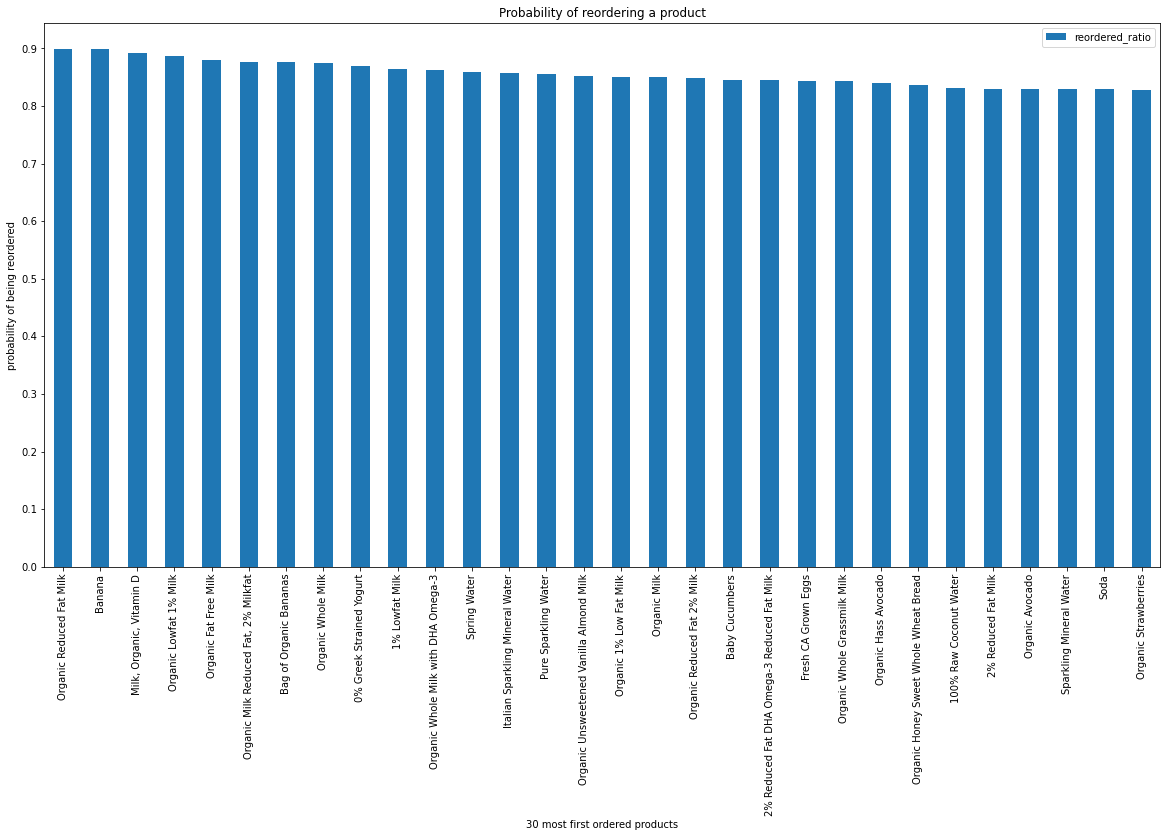

In [53]:
ax = group.iloc[:30].plot.bar(x='product_name', y='reordered_ratio')
plt.xlabel('30 most first ordered products')
plt.ylabel('probability of being reordered')
plt.xticks(rotation=90)
plt.title('Probability of reordering a product')
ax.set_yticks(np.arange(0.0, 1.0, 0.1))
plt.show()

In [54]:
fat_milk_purchases = order_products['product_name']=='Organic Reduced Fat Milk'
fat_milk_no = fat_milk_purchases & order_products['reordered']==1
print(f'Count of total Organic Reduced Fat Milk purchases: {order_products[fat_milk_purchases].shape}')
print(f'Count of reordered Organic Reduced Fat Milk purchases: {order_products[fat_milk_no].shape}')

Count of total Organic Reduced Fat Milk purchases: (36869, 17)
Count of reordered Organic Reduced Fat Milk purchases: (31394, 17)


* Organic Prodcuts

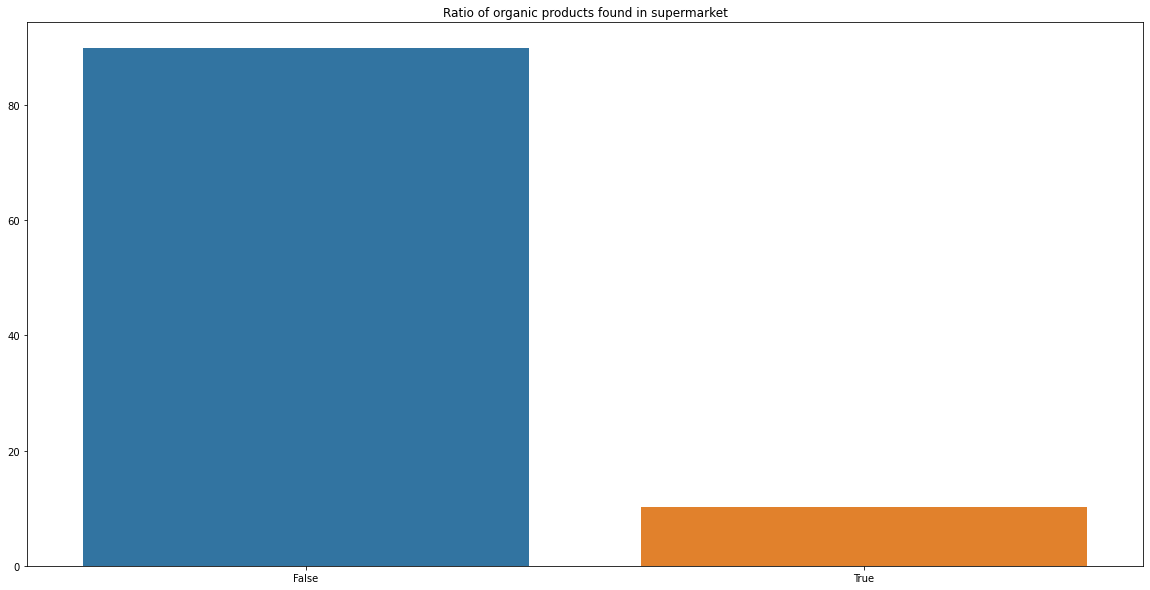

In [55]:
total_products_count = prod.shape[0]
organic_ratio = prod['is_organic'].value_counts()/total_products_count*100
sns.barplot(x= organic_ratio.index, y=organic_ratio.values)
plt.title('Ratio of organic products found in supermarket')
plt.show()

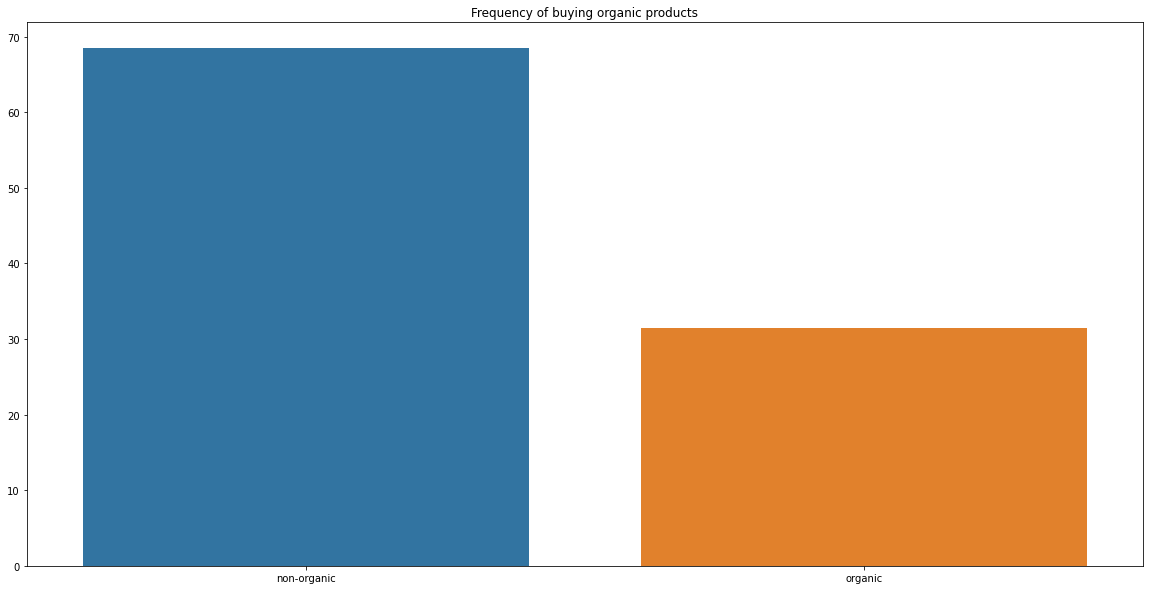

In [56]:
total_order_products_count = order_products.shape[0]
organic_freq = order_products['is_organic'].value_counts()/total_order_products_count*100
ax = sns.barplot(x= organic_freq.index, y=organic_freq.values)
ax.set_xticklabels(['non-organic', 'organic'])
plt.title('Frequency of buying organic products')
plt.show()

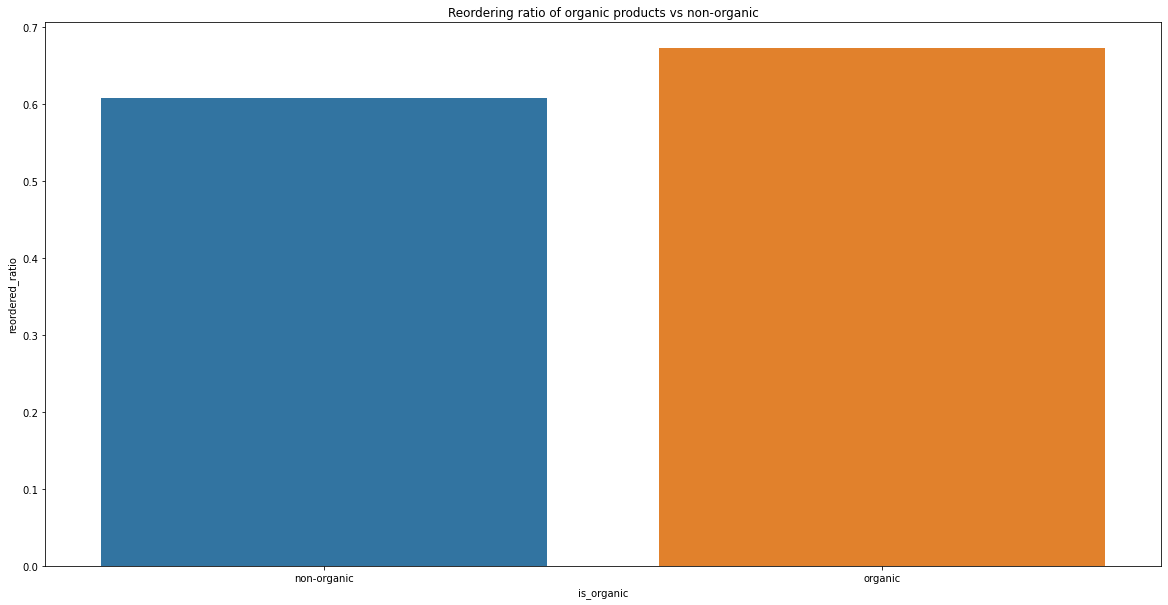

In [57]:
nfo = order_products['order_number'] != 1
group = order_products[nfo].groupby(['is_organic']).agg({'reordered':'mean'}).rename(columns={'reordered':'reordered_ratio'}).reset_index()
ax = sns.barplot(x='is_organic', y='reordered_ratio', data=group)
ax.set_xticklabels(['non-organic', 'organic'])
plt.title('Reordering ratio of organic products vs non-organic')
plt.show()

In [58]:
group = order_products.groupby(['order_dow', 'order_hour_of_day'])['is_organic'].agg('sum').reset_index().rename(columns={'is_organic':'organic_products_count'})
heatmap_data = group.pivot('order_dow', 'order_hour_of_day', 'organic_products_count')

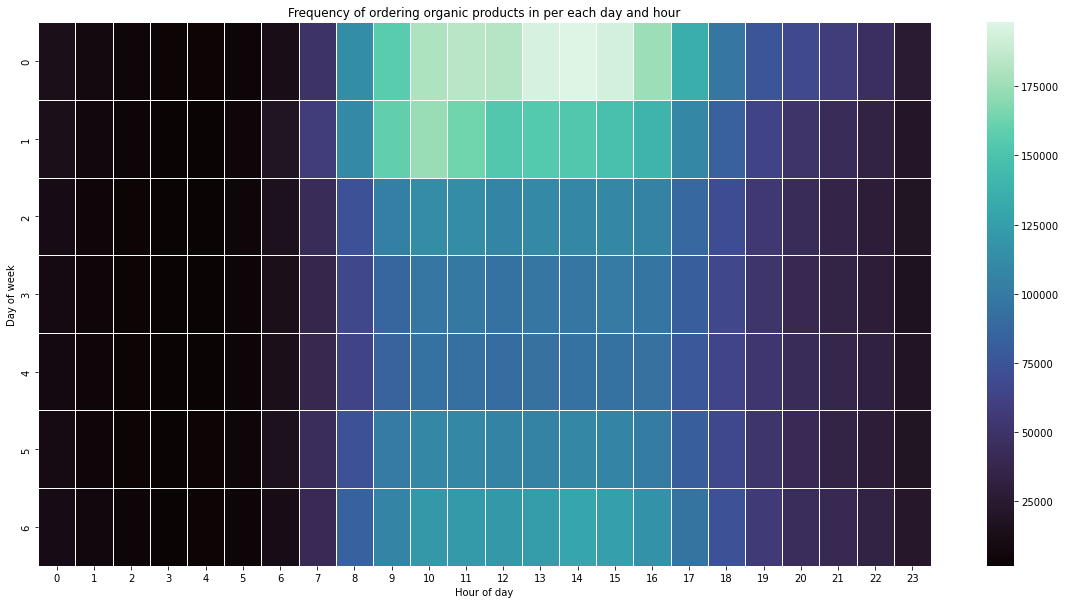

In [59]:
sns.heatmap(data=heatmap_data, cmap='mako', linewidths=.5)
plt.title('Frequency of ordering organic products in per each day and hour')
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.show()

* Count of products in each department

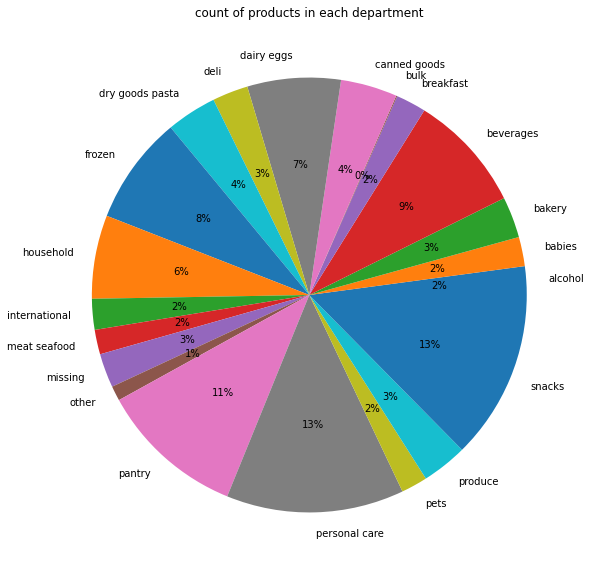

In [60]:
prod_dept = prod.merge(dept, on='department_id', how='left')
data = prod_dept.groupby(['department']).agg({'product_id':'count'}).reset_index().rename(columns={'product_id':'products_count'})
plt.pie(data['products_count'], labels = data['department'], autopct='%.0f%%', radius=1)
plt.title('count of products in each department')
plt.show()

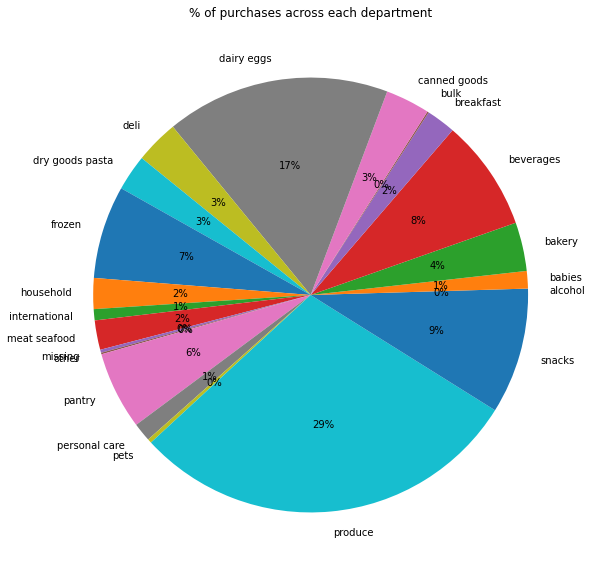

In [61]:
top = order_products.shape[0]
group = order_products.groupby(['department'], as_index=False).count().rename(columns={'department_id':'count_of_ordered_prods'})
plt.pie(group['count_of_ordered_prods'], labels = group['department'], autopct='%.0f%%', radius=1)
plt.title('% of purchases across each department')
plt.show()

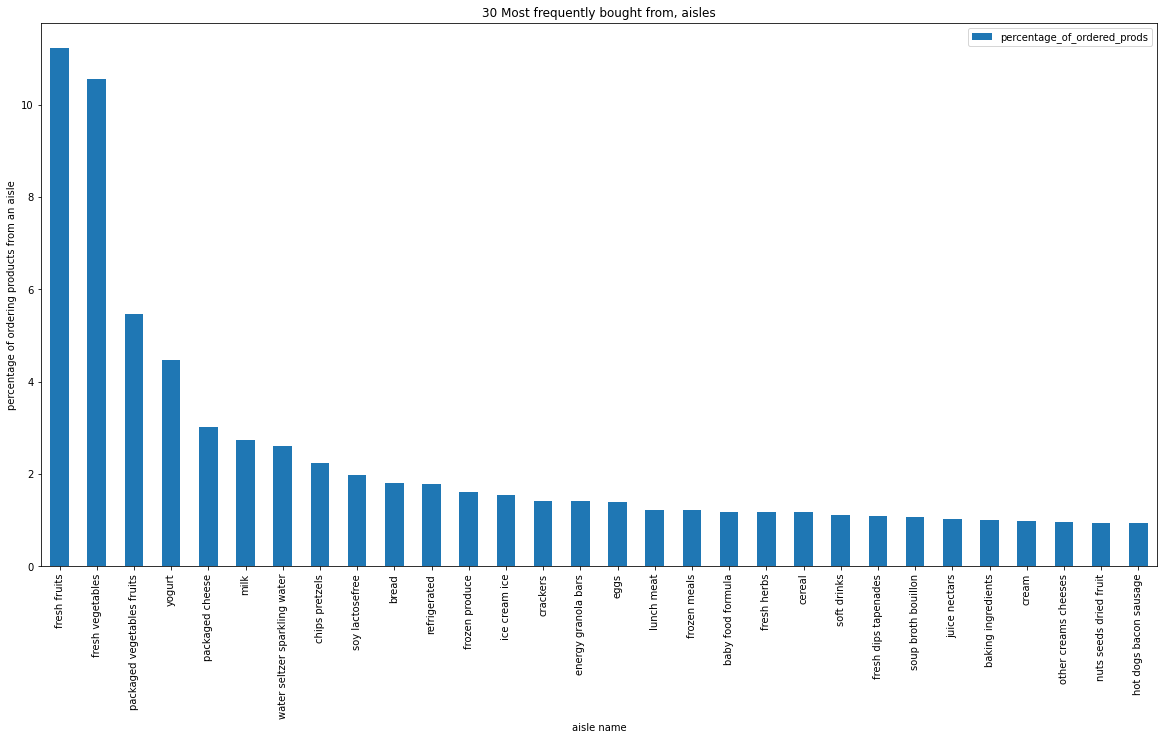

In [62]:
top = order_products.shape[0]
group = order_products.groupby(['aisle'], as_index=False).agg({'aisle_id':'count'}).rename(columns={'aisle_id':'count_of_ordered_prods'})
group['percentage_of_ordered_prods'] = group['count_of_ordered_prods']/top*100
group = group.sort_values(by=['count_of_ordered_prods'], ascending=False)
group.iloc[:30].plot.bar(x='aisle', y='percentage_of_ordered_prods')
plt.ylabel('percentage of ordering products from an aisle')
plt.xlabel('aisle name')
plt.xticks(rotation=90)
plt.title('30 Most frequently bought from, aisles')
plt.show()

* Reorder ratio for various departments

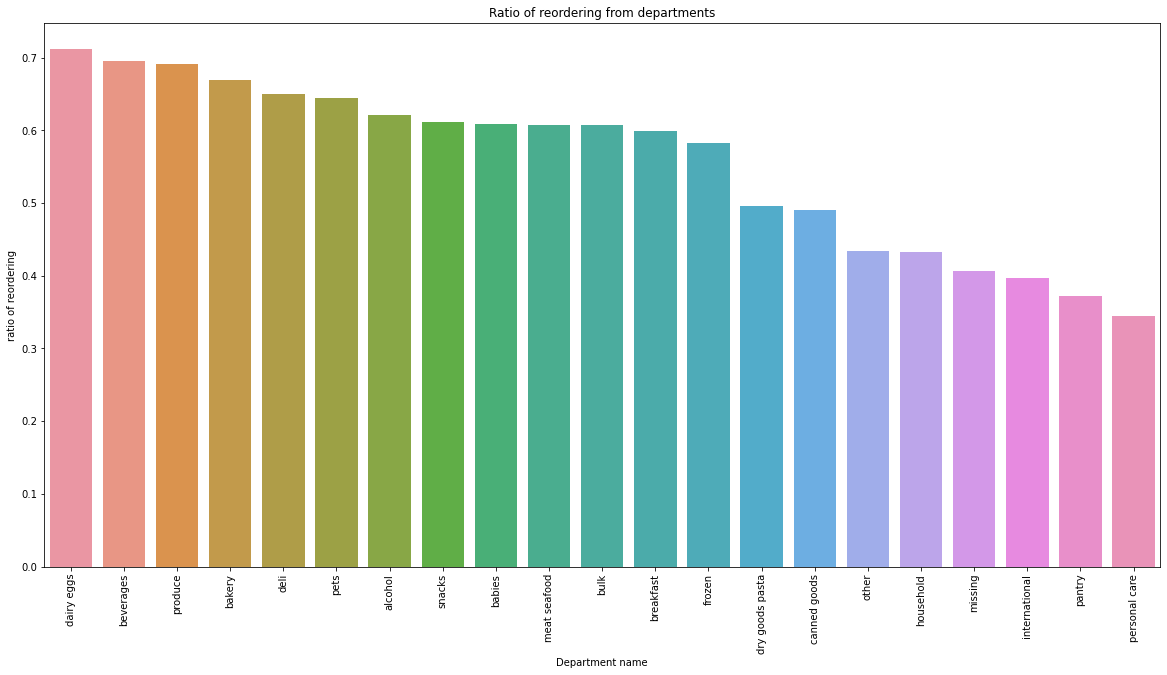

In [63]:
nfo = order_products['order_number'] != 1
group = order_products[nfo].groupby(['department']).agg({'reordered':'mean'}).reset_index().rename(columns={'reordered':'reordered_ratio'})
group = group.sort_values(by=['reordered_ratio'], ascending=False)
sns.barplot(x='department', y='reordered_ratio', data=group)
plt.title('Ratio of reordering from departments')
plt.ylabel('ratio of reordering')
plt.xticks(rotation=90)
plt.xlabel('Department name')
plt.show()

* Ordering Frequency of Specific Department

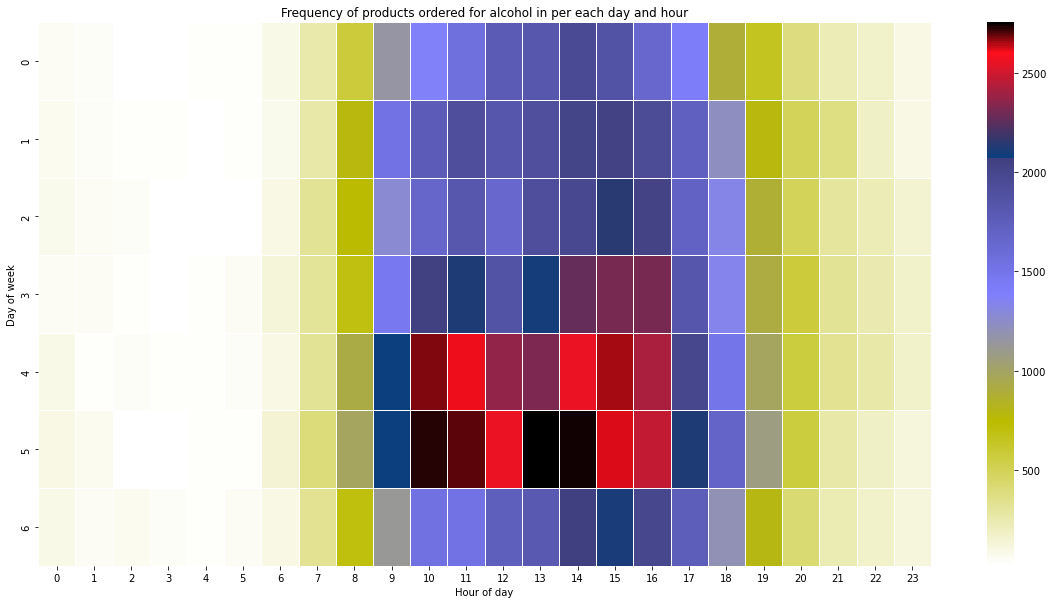

In [64]:
dep_name='alcohol'
exists = dep_name in dept['department'].unique()

if (exists):
    dep_order_products = order_products[order_products['department']==dep_name]
    group = dep_order_products.groupby(['order_dow', 'order_hour_of_day']).agg('count').reset_index().rename(columns={'order_id':'order_prods_count'})
    heatmap_data = group.pivot('order_dow', 'order_hour_of_day', 'order_prods_count')

    ax = sns.heatmap(data=heatmap_data, cmap="gist_stern_r", linewidths=.5)
    plt.title('Frequency of products ordered for '+dep_name+' in per each day and hour')
    plt.ylabel('Day of week')
    plt.xlabel('Hour of day')
    plt.show()

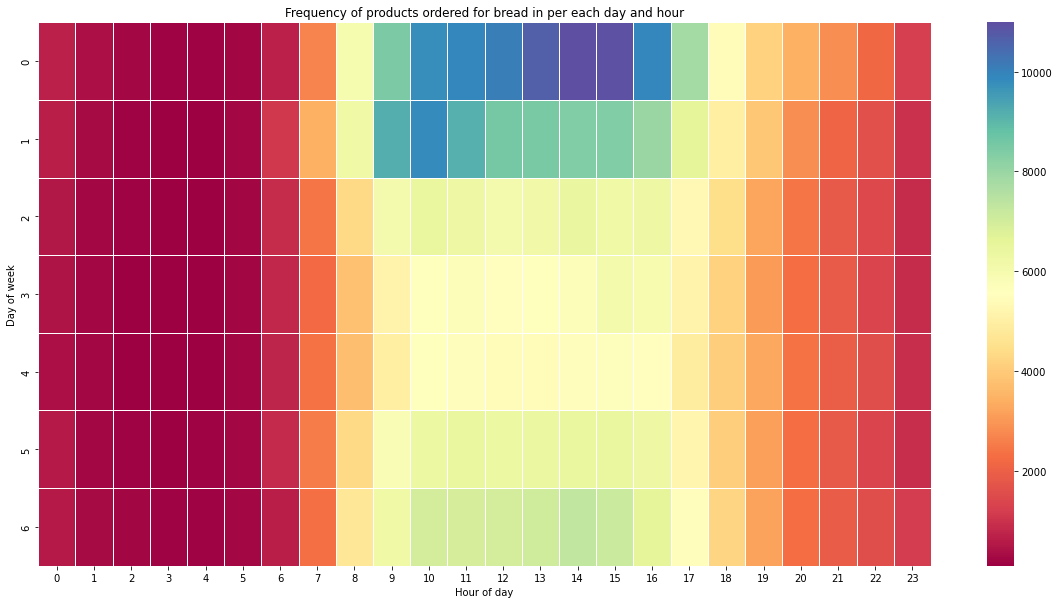

In [65]:
aisle_name = 'bread'
exists = aisle_name in aisle['aisle'].unique()

if (exists):
    aop = order_products[order_products['aisle']==aisle_name]
    group = aop.groupby(['order_dow', 'order_hour_of_day']).agg('count').reset_index().rename(columns={'order_id':'order_prods_count'})
    heatmap_data = group.pivot('order_dow', 'order_hour_of_day', 'order_prods_count')
    ax = sns.heatmap(data=heatmap_data, cmap="Spectral", linewidths=.5)
    plt.title('Frequency of products ordered for '+aisle_name+' in per each day and hour')
    plt.ylabel('Day of week')
    plt.xlabel('Hour of day')
    plt.show()


### Model Building

In [66]:
users = order[order['eval_set'] == 'prior']
users['days_since_prior_order'].dropna()

1          15.0
2          21.0
3          29.0
4          28.0
5          19.0
           ... 
3421077    22.0
3421078    29.0
3421079    30.0
3421080    18.0
3421081     7.0
Name: days_since_prior_order, Length: 3008665, dtype: float64

In [67]:
users = users.groupby('user_id').agg(user_orders= ('order_number' , max),
                                     user_period=('days_since_prior_order', sum),
                                     user_mean_days_since_prior = ('days_since_prior_order','mean'))
users.head()

,user_orders,user_period,user_mean_days_since_prior
user_id,,,
1,10,176.0,19.555556
2,14,198.0,15.230769
3,12,133.0,12.090909
4,5,55.0,13.750000
5,4,40.0,13.333333


In [68]:
orders_products =pd.merge(order , opp, on='order_id', how='inner')
groupedorders_products = orders_products.groupby(['order_id']).agg(basket_size = ('product_id', 'count')).reset_index()
orders_products = orders_products.merge(groupedorders_products, on='order_id', how='left')
orders_products.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,basket_size
0,2539329,1,prior,1,2,8,NaN,196,1,0,5
1,2539329,1,prior,1,2,8,NaN,14084,2,0,5
2,2539329,1,prior,1,2,8,NaN,12427,3,0,5
3,2539329,1,prior,1,2,8,NaN,26088,4,0,5
4,2539329,1,prior,1,2,8,NaN,26405,5,0,5


In [69]:
orders_products['p_reordered']= orders_products['reordered']==1
orders_products['non_first_order']= orders_products['order_number']>1
us=orders_products
us=orders_products.groupby('user_id').agg(user_total_products =('user_id','count'),
                                          p_reordered =('p_reordered', sum) ,
                                          non_first_order =('non_first_order', sum),
                                          user_distinct_products=('product_id','nunique')).reset_index()

In [70]:
us['user_reorder_ratio']=us['p_reordered']/us['non_first_order']
del us["p_reordered"],us["non_first_order"]
del orders_products['p_reordered' ],orders_products['non_first_order']
us.head()

,user_id,user_total_products,user_distinct_products,user_reorder_ratio
0,1,59,18,0.759259
1,2,195,102,0.510989
2,3,88,33,0.705128
3,4,18,17,0.071429
4,5,37,23,0.538462


In [71]:
users =pd.merge(users,us ,on='user_id',  how='inner')
users['user_average_basket'] = users['user_total_products'] / users['user_orders']
users.head()

,user_id,user_orders,user_period,user_mean_days_since_prior,user_total_products,user_distinct_products,user_reorder_ratio,user_average_basket
0,1,10,176.0,19.555556,59,18,0.759259,5.900000
1,2,14,198.0,15.230769,195,102,0.510989,13.928571
2,3,12,133.0,12.090909,88,33,0.705128,7.333333
3,4,5,55.0,13.750000,18,17,0.071429,3.600000
4,5,4,40.0,13.333333,37,23,0.538462,9.250000


In [72]:
us = order[order['eval_set'] != 'prior']
us['time_since_last_order'] = us['days_since_prior_order']
us['future_order_dow'] = us['order_dow']
us['future_order_hour_of_day'] = us['order_hour_of_day']
us = us[['user_id','order_id','eval_set','time_since_last_order', 'future_order_dow', 'future_order_hour_of_day']]
users_features = pd.merge(users , us, on='user_id', how='inner') 
del us, users
users_features.head()

,user_id,user_orders,user_period,user_mean_days_since_prior,user_total_products,user_distinct_products,user_reorder_ratio,user_average_basket,order_id,eval_set,time_since_last_order,future_order_dow,future_order_hour_of_day
0,1,10,176.0,19.555556,59,18,0.759259,5.900000,1187899,train,14.0,4,8
1,2,14,198.0,15.230769,195,102,0.510989,13.928571,1492625,train,30.0,1,11
2,3,12,133.0,12.090909,88,33,0.705128,7.333333,2774568,test,11.0,5,15
3,4,5,55.0,13.750000,18,17,0.071429,3.600000,329954,test,30.0,3,12
4,5,4,40.0,13.333333,37,23,0.538462,9.250000,2196797,train,6.0,0,11


In [73]:
def datetime_to_radians(x):
    seconds_from_midnight = 3600 * x
    radians = float(seconds_from_midnight) / float(12 * 60 * 60) * 2.0 * math.pi
    return radians

In [74]:
def average_angle(angles):
    x_sum = np.sum(np.sin(angles))
    y_sum = np.sum(np.cos(angles))
    x_mean = x_sum / float(len(angles))
    y_mean = y_sum / float(len(angles))
    return np.arctan2(x_mean, y_mean)

In [75]:
def radians_to_time_of_day(x):
    seconds_from_midnight = int(float(x) / (2.0 * math.pi) * 12.0 * 60.0 * 60.0)
    hour = seconds_from_midnight // 3600 % 24
    minute = (seconds_from_midnight % 3600) // 60
    second = seconds_from_midnight % 60
    return datetime.time(hour, minute, second)

In [76]:
def average_times_of_day(x):
    angles = [datetime_to_radians(y) for y in x]
    avg_angle = average_angle(angles)
    return radians_to_time_of_day(avg_angle)

In [77]:
def day_to_radians(day):
    radians = float(day) / float(7) * 2.0 * math.pi
    return radians
def radians_to_days(x):
    day = int(float(x) / (2.0 * math.pi) * 7) % 7
    return day
def average_days(x):
    angles = [day_to_radians(y) for y in x]
    avg_angle = average_angle(angles)
    return radians_to_days(avg_angle)

In [78]:
prod_features = orders_products.groupby(['product_id']).agg(prod_freq = ('order_id', 'count'),
                                                            prod_avg_position = ('add_to_cart_order', 'mean'),
                                                            prod_avg_hour = ('order_hour_of_day', average_times_of_day),
                                                            prod_avg_dow = ('order_dow', average_days)).reset_index()
prod_features.head()

,product_id,prod_freq,prod_avg_position,prod_avg_hour,prod_avg_dow
0,1,1852,5.801836,23:36:11,2
1,2,90,9.888889,00:43:10,0
2,3,277,6.415162,22:00:19,0
3,4,329,9.507599,01:29:15,0
4,5,15,6.466667,23:06:53,0


In [79]:
data = orders_products
data = data.groupby(['user_id','product_id']).agg(up_orders= ('product_id', 'count'),
                                                  up_first_order=('order_number', min),
                                                  up_last_order = ('order_number',max),
                                                  up_average_cart_position = ('add_to_cart_order','mean'),
                                                  up_avg_hour = ('order_hour_of_day', average_times_of_day),
                                                  up_avg_dow = ('order_dow', average_days)).reset_index() 
del orders_products
data.head()

,user_id,product_id,up_orders,up_first_order,up_last_order,up_average_cart_position,up_avg_hour,up_avg_dow
0,1,196,10,1,10,1.400000,19:00:00,2
1,1,10258,9,2,10,3.333333,18:33:38,2
2,1,10326,1,5,5,5.000000,02:59:59,4
3,1,12427,10,1,10,3.300000,19:00:00,2
4,1,13032,3,2,10,6.333333,20:00:00,2


In [80]:
data = data.merge(users_features[['user_id','user_orders']], on='user_id' , how='left')
data['up_order_rate'] = data['up_orders']/data['user_orders']
data['up_orders_since_last_order'] = data['user_orders'] - data['up_last_order']
data['up_order_rate_since_first_order'] = data['up_orders']/(data['user_orders'] - data['up_first_order'] + 1)
del data['user_orders']
data.head()

,user_id,product_id,up_orders,up_first_order,up_last_order,up_average_cart_position,up_avg_hour,up_avg_dow,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order
0,1,196,10,1,10,1.400000,19:00:00,2,1.0,0,1.000000
1,1,10258,9,2,10,3.333333,18:33:38,2,0.9,0,1.000000
2,1,10326,1,5,5,5.000000,02:59:59,4,0.1,5,0.166667
3,1,12427,10,1,10,3.300000,19:00:00,2,1.0,0,1.000000
4,1,13032,3,2,10,6.333333,20:00:00,2,0.3,0,0.333333


In [81]:
data = data.merge(users_features, on='user_id', how='left').merge(prod_features, on='product_id', how='left')
del users_features, prod_features
order_products_future = opt.merge(order, on='order_id', how='left')
order_products_future = order_products_future[['user_id', 'product_id', 'reordered']]
data = data.merge(order_products_future, on=['user_id', 'product_id'], how='left')
data['reordered'].fillna(0, inplace = True)

In [82]:
def diff_bet_time(arr1, arr2, max_value=23):
    arr1 = pd.to_datetime(arr1, format='%H')
    arr2 = pd.to_datetime(arr2, format='%H:%M:%S')
    arr_diff = np.abs(arr1.dt.hour-arr2.dt.hour)
    return np.minimum(arr_diff, max_value- (arr_diff-1))

In [83]:
def diff_bet_dow(arr1, arr2, max_value=6):
    arr_diff = np.abs(arr1-arr2)
    return np.minimum(arr_diff, max_value- (arr_diff-1))

In [84]:
data['up_hour_diff'] = diff_bet_time(data['future_order_hour_of_day'], data['up_avg_hour'])
data['up_dow_diff'] = diff_bet_dow(data['future_order_dow'], data['up_avg_dow'])

data['prod_hour_diff'] = diff_bet_time(data['future_order_hour_of_day'], data['prod_avg_hour'], )
data['prod_dow_diff'] = diff_bet_dow(data['prod_avg_dow'], data['future_order_dow'])

del data['prod_avg_dow'], data['prod_avg_hour'],
del data['future_order_hour_of_day'], data['up_avg_hour'], data['future_order_dow'], data['up_avg_dow']

#### Splitting of the Data

In [85]:
X_train = data[data['eval_set'] == 'train']
y_train = X_train['reordered']
X_test = data[data['eval_set'] == 'test']
del data

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
print('Class distribution before splitting')
pos_count = np.sum(X_train['reordered']==1)
neg_count = np.sum(X_train['reordered']==0)
print('positive ratio: ', pos_count)
print('negative count: ', neg_count)
print('positive ratio: ', pos_count/(pos_count+neg_count))

Class distribution before splitting
positive ratio:  828824
negative count:  7645837
positive ratio:  0.09780025419305857


In [88]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)
print('Class distribution of Train set')
train_pos_count = np.sum(X_train['reordered']==1)
train_neg_count = np.sum(X_train['reordered']==0)
print('positive count: ', train_pos_count)
print('negative count: ', train_neg_count)
print('positive ratio: ', train_pos_count/(train_pos_count+train_neg_count))

Class distribution of Train set
positive count:  580063
negative count:  5352199
positive ratio:  0.09778108249433352


In [89]:
print('Class distribution of Validation set')
val_pos_count = np.sum(X_val['reordered']==1)
val_neg_count = np.sum(X_val['reordered']==0)
print('positive count: ', val_pos_count)
print('negative count: ', val_neg_count)
print('positive ratio: ', val_pos_count/(val_pos_count+val_neg_count))

Class distribution of Validation set
positive count:  248761
negative count:  2293638
positive ratio:  0.09784498813915518


In [90]:
X_train_non_pred_vars = X_train[['product_id', 'order_id', 'user_id']]
X_train.drop(['reordered', 'eval_set', 'product_id', 'order_id', 'user_id'], axis=1, inplace=True)

X_val_non_pred_vars = X_val[['product_id', 'order_id', 'user_id']]
X_val.drop(['reordered', 'eval_set', 'product_id', 'order_id', 'user_id'], axis=1, inplace=True)

X_test_non_pred_vars = X_test[['product_id', 'order_id', 'user_id']]
X_test.drop(['reordered', 'eval_set', 'product_id', 'order_id', 'user_id'], axis=1, inplace=True)

In [91]:
X_train.drop(['up_orders', 'up_last_order', 'user_total_products', 'user_distinct_products'], axis=1, inplace=True)
X_test.drop(['up_orders', 'up_last_order', 'user_total_products', 'user_distinct_products'], axis=1, inplace=True)
X_val.drop(['up_orders', 'up_last_order', 'user_total_products', 'user_distinct_products'], axis=1, inplace=True)

In [92]:
X_train.shape, y_train.shape

((5932262, 17), (5932262,))

In [93]:
X_val.shape, y_val.shape

((2542399, 17), (2542399,))

In [94]:
X_test.shape

(4833292, 17)

In [95]:
X_train.columns

Index(['up_first_order', 'up_average_cart_position', 'up_order_rate',
       'up_orders_since_last_order', 'up_order_rate_since_first_order',
       'user_orders', 'user_period', 'user_mean_days_since_prior',
       'user_reorder_ratio', 'user_average_basket', 'time_since_last_order',
       'prod_freq', 'prod_avg_position', 'up_hour_diff', 'up_dow_diff',
       'prod_hour_diff', 'prod_dow_diff'],
      dtype='object')

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)

In [98]:
from sklearn import metrics

In [99]:
from xgboost import XGBClassifier

In [100]:
xgb = XGBClassifier()
clf = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.4, learning_rate = 0.1,
                    max_depth = 5, reg_lambda = 5.0, n_estimators = 100)
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [101]:
from sklearn.feature_selection import SelectFromModel

In [102]:
print(clf.feature_importances_)

[0.05473513 0.01199405 0.2611171  0.2811747  0.15538867 0.03262568
 0.02787182 0.01052308 0.03985765 0.00557154 0.01791492 0.03271532
 0.0448982  0.00599055 0.01228629 0.0010221  0.00431325]


In [103]:
y_test_prob = clf.predict_proba(X_test)[:, 1]
y_val_prob = clf.predict_proba(X_val)[:, 1]
y_train_prob = clf.predict_proba(X_train)[:, 1]

In [104]:
def maximize_metric_keep_metric(metric1_list, metric2_list, metric2_thresh=0.3):
    for idx in range(len(metric1_list)):
        if(metric2_list[idx] > metric2_thresh):
            return idx
    return -1

In [105]:
from sklearn.metrics import precision_recall_curve

In [106]:
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob)
f1_scores = 2*recall*precision/(recall+precision)
opt_indx = np.argmax(f1_scores)
print("Maximuim f1_score for the positive class: ", f1_scores[opt_indx])
print("Precision: ", precision[opt_indx])
print("Recall: ", recall[opt_indx])
print("Threshold: ", thresholds[opt_indx])
best_thresh = thresholds[opt_indx]

Maximuim f1_score for the positive class:  0.4360198318316766
Precision:  0.4029795768018663
Recall:  0.4749619112320661
Threshold:  0.22536466


In [107]:
opt_indx = maximize_metric_keep_metric(metric1_list=recall, metric2_list=precision, metric2_thresh=0.3)
print("Max recall for the positive class: ", recall[opt_indx])
print("Precision: ", precision[opt_indx])
print("f1_score: ", f1_scores[opt_indx])
print("Threshold: ", thresholds[opt_indx])
best_thresh = thresholds[opt_indx]

Max recall for the positive class:  0.6445061725913628
Precision:  0.30000037423328957
f1_score:  0.4094245691003554
Threshold:  0.13569114


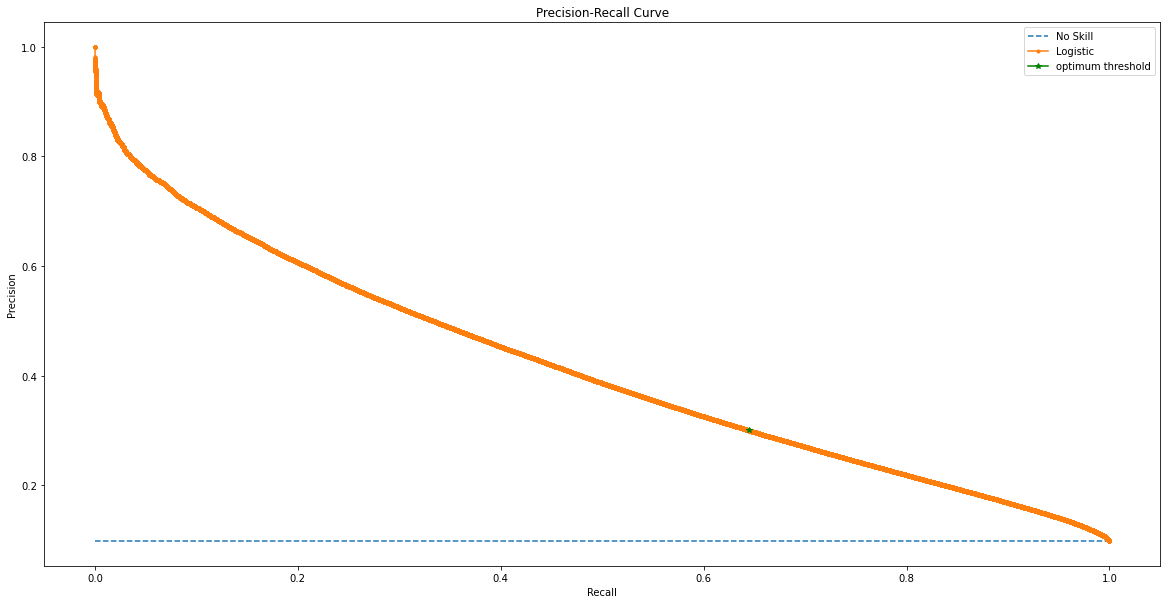

In [108]:
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.plot(recall[opt_indx], precision[opt_indx], marker='*', color='g', label='optimum threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [109]:
def recommended_basket(user_prods):
    user_basket_size = int(np.floor(user_prods['user_average_basket'].iloc[0]))
    user_prods = user_prods.sort_values(by=['reordered_prop'], ascending=False)
    user_prods.iloc[:user_basket_size]['reordered'] = 1
    user_prods.iloc[user_basket_size:]['reordered'] = 0

In [110]:
y_test_preds = y_test_prob>best_thresh
y_val_preds = y_val_prob>best_thresh
y_train_preds = y_train_prob>best_thresh

In [111]:
from sklearn.metrics import confusion_matrix, classification_report

In [112]:
print('-----------------CLASSIFICATION REPORT--------------------')
print("Train positive class count: ", y_train.sum())
print("Train negative class count: ", y_train.shape[0] - y_train.sum())
print("Train Set tn, fp, fn, tp:",confusion_matrix(y_train, y_train_preds).ravel())
print("Train Set report:",classification_report(y_train, y_train_preds))

print("Validation positive class count: ", y_val.sum())
print("Validation negative class count: ", y_val.shape[0] - y_val.sum())
print("Validation Set tn, fp, fn, tp:",confusion_matrix(y_val, y_val_preds).ravel())
print("Validation Set report:",classification_report(y_val, y_val_preds))

-----------------CLASSIFICATION REPORT--------------------
Train positive class count:  580063.0
Train negative class count:  5352199.0
Train Set tn, fp, fn, tp: [4482123  870076  204977  375086]
Train Set report:               precision    recall  f1-score   support

         0.0       0.96      0.84      0.89   5352199
         1.0       0.30      0.65      0.41    580063

    accuracy                           0.82   5932262
   macro avg       0.63      0.74      0.65   5932262
weighted avg       0.89      0.82      0.85   5932262

Validation positive class count:  248761.0
Validation negative class count:  2293638.0
Validation Set tn, fp, fn, tp: [1919541  374097   88433  160328]
Validation Set report:               precision    recall  f1-score   support

         0.0       0.96      0.84      0.89   2293638
         1.0       0.30      0.64      0.41    248761

    accuracy                           0.82   2542399
   macro avg       0.63      0.74      0.65   2542399
weighted avg